*presented* *by*  **Darshana** **Subhash**

# **1D** **Convolution**

<b> 

*   
In deep learning, a convolutional neural network (CNN, or ConvNet) is a classof deep neural networks,where The name “convolutional neural network” indicates that the network employs a mathematical operation called convolution. 
*   A convolutional neural network consists of an input layer, hidden layers and an output layer. In any feed-forward neural network, any middle layers are called hidden because their inputs and outputs are masked by the activation function and final convolution. In a convolutional neural network, the hidden layers include layers that perform convolutions. Typically this includes a layer that does element-wise multiplication or dot product.
*   1D Convolutions are simplified version of the 2D Convolution.</list>
Unlike 2D Convolutions, where we slide the kernel in two directions, for 1D Convolutions we only slide the kernel in a single direction as shown in the below diagram.
*  In a CNN, the input is a tensor with a shape: (number of inputs) x (input height) x (input width) x (input channels). After passing through a convolutional layer, the image becomes abstracted to a feature map, also called an activation map, with shape: (number of inputs) x (feature map height) x (feature map width) x (feature map channels). A convolutional layer within a CNN generally has the following attributes:


*  Convolutional filters/kernels defined by a width and height (hyper-parameters).
The number of input channels and output channels (hyper-parameters). One layer's input channels must equal the number of output channels (also called depth) of its input.
Additional hyperparameters of the convolution operation, 
such as:   padding, 
stride,
dilation.




















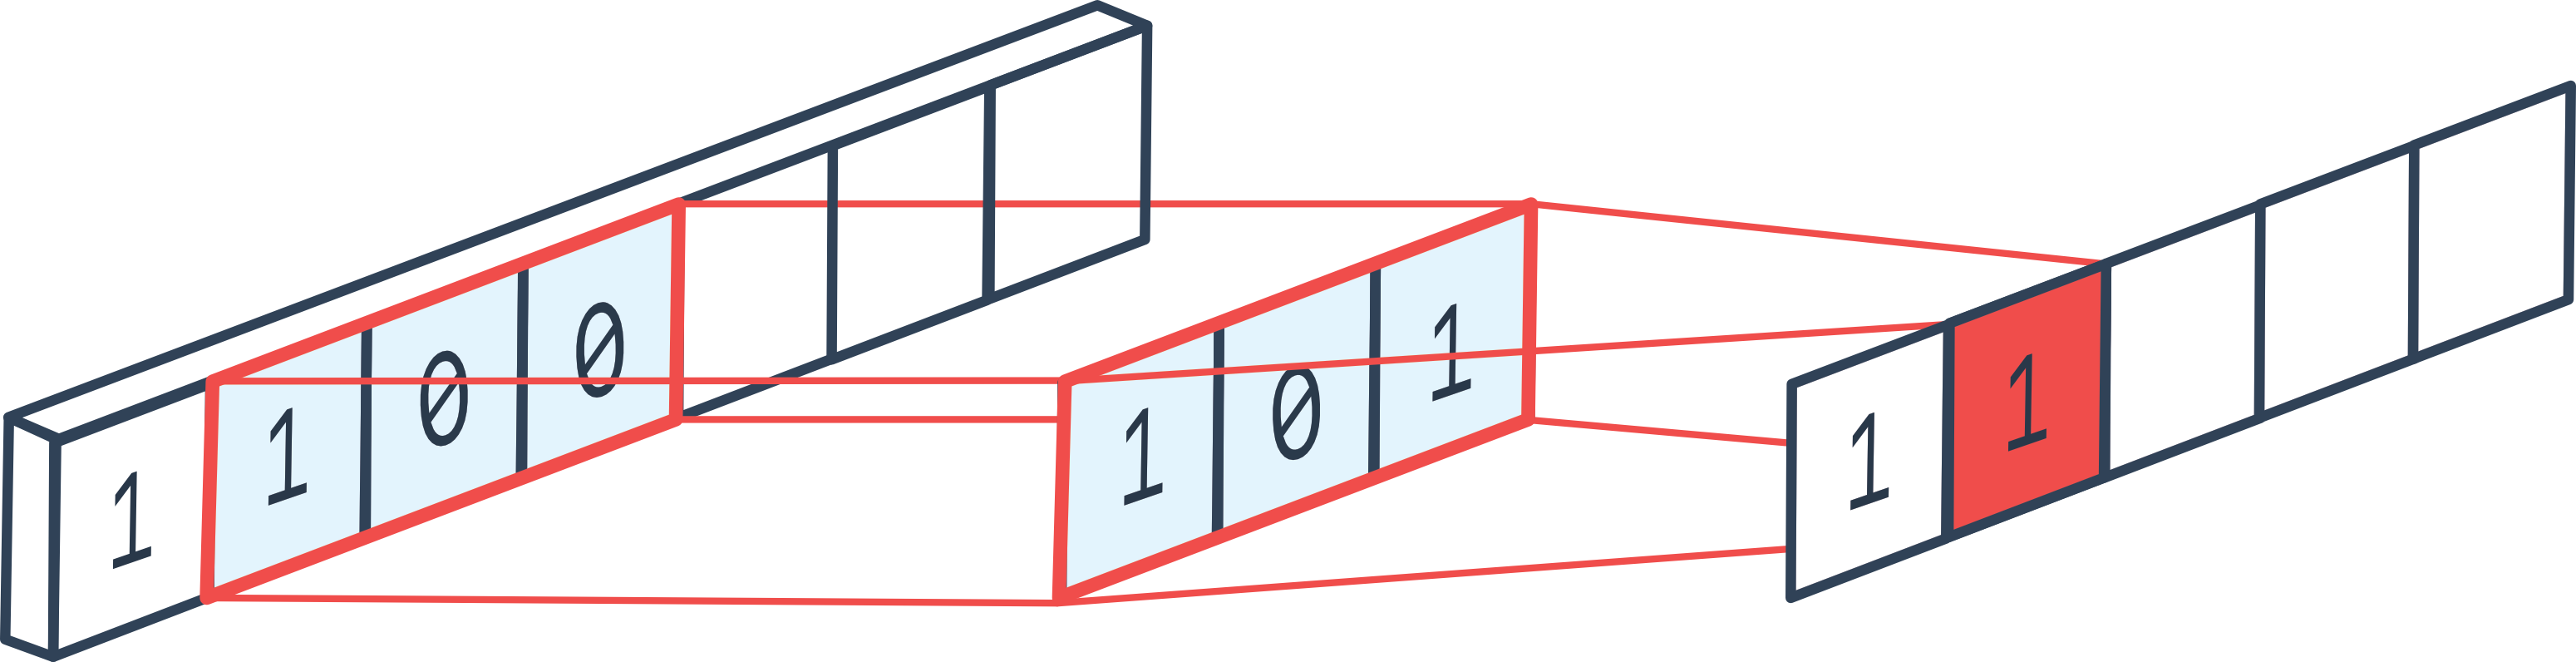

<B>Example: 1D Convolution  with default padding where padding field is set to='Valid'

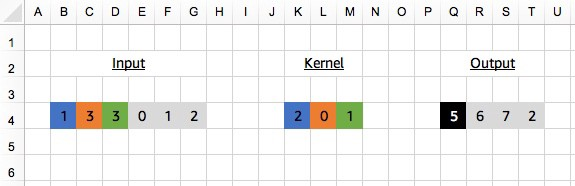

<B> Example: 1D Convolution with zero padding where padding field is set to= 'Same'

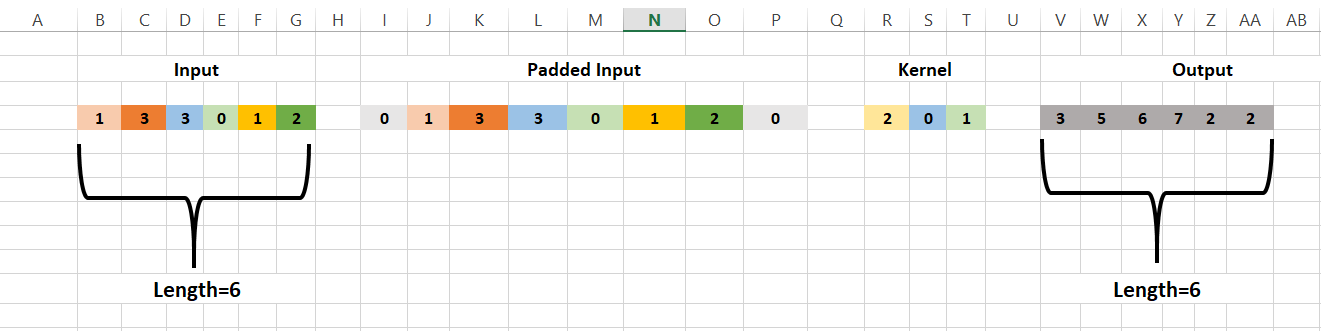

<B>Below code is been designed keeping into consideration of traversing through multiple layers of filter or filters and extending the code to work for Conv 2D as well as Conv 3D.

Convolution Class takes 3 parameters namely: filter_len(Filter length),n_f(Number of filters),b(bias)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv1D
import pandas as pd 
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [2]:
# Function for 1DConvolution which will convolve one and only input layer sequence with a filter
def conv1d(input,filter,stride,padding):
  print("Filter",filter)
  input=input.reshape(-1)
  n_f=filter.shape[0]
  print("Input",input)
  if (len(input.shape)>3):
    m=input.shape[3]
    n=filter.shape[3]
  elif (len(input.shape)>2 and len(filter.shape)>3): 
    m=input.shape[2]
    n=filter.shape[3]
  elif (len(input.shape)>2 and len(filter.shape)>2): 
    m=input.shape[2]
    n=filter.shape[2]  
  elif (len(input.shape)<2 and len(filter.shape)==2): 
    m=input.shape[0]
    n=filter.shape[1]    
  else: 
    m=input.size
    n=filter.shape[2] 
  padding_strings = {'same', 'valid'}
  if padding not in padding_strings:
    raise ValueError("Invalid padding string {!r}, should be one of {}".format(padding,padding_strings))       
  if padding == 'valid':
    output_size=int((m-n)/stride)+1
    result=np.zeros((n_f,1,output_size))
    ###Traversing through the input layer sequence from left to right and perform dot operation with kernel with restricted stride
    for filter_num in range(n_f):
      print("Convolving"+" "+"input"+str(input)+"with filter"+str(filter[filter_num,:]))
      for i in range(output_size):
        shift=i*stride
        try: 
          result[filter_num,:,i]=np.dot(filter[filter_num,:],input[shift:shift+n])   
        except:    
          print(" ")
    return result
  elif padding == 'same':
    if padding == 'same' and stride!=1:
      raise ValueError("padding='same' is not supported for strided convolutions where stride is greater than 1")   
    
    p=(n-1)//2
    print("P:",p)
    input=np.pad(input,(p,p), 'constant', constant_values=(0, 0))
    print("Input after padding:",input)
    output_size=int((input.size-n+2*p)/stride)+1
    result=np.zeros((n_f,1,output_size))
    for filter_num in range(n_f):
      print("Convolving"+" "+"input"+str(input)+"with filter"+str(filter[filter_num,:]))
      for i in range(output_size):
        shift=i*stride
        try: 
          result[filter_num,:,i]=np.dot(filter[filter_num,:],input[shift:shift+n])                   
        except:    
          print(" ")
    return result


In [3]:
####Implementation of Convolution which can be modified on the need basis depending on 1D,2D or 3D convolution

###Convolution Class takes 3 parameters namely: filter_len(Filter length),n_f(Number of filters),b(bias)
class Convolution:
  def __init__(self,filter_len,n_f,b):
    np.random.seed(1)
    self.filter=np.random.randint(5,size=(n_f,1,filter_len))
    self.filter_len=filter_len
    self.n_f=n_f
    self.bias=np.random.randint(b,size=1)
    print("Bias:",self.bias)  
 ###This function will loop through sequence of layers if Output sequence from previous convolution layer has more than 1 layer
 ###depending on the condition met inside the function.Prechecks like padding field are validated at the same time.

  def conv(self,input,n_f,stride,padding): 
    self.n_f=n_f
    self.input=input
    self.stride=stride
    self.padding=padding
    if len(self.input.shape) > 1: # Check if its an input sequence or previous input sequence in case of more than 1 convo layer
      if (self.input.shape[0]>1): # Check if its an input sequence with 1 layer or more than a layer
        depth=self.input.shape[0] # initialize depth for filter sequence based on the number of filters of previous convolution layer output sequence/number of output sequences   
        self.filter=np.random.randint(5,size=(self.n_f,depth,1,3))
        print("Filter:",self.filter,self.filter.shape)
      else:
          self.filter=np.random.randint(5,size=(self.n_f,1,3))
          print("Filter:",self.filter,self.filter.shape)

      if (len(self.input.shape)>3):
        m=self.input.shape[3]
        n=self.filter.shape[3]
      elif (len(self.input.shape)>2 and len(self.filter.shape)>3): 
        m=self.input.shape[2]
        n=self.filter.shape[3]
      elif (len(self.input.shape)>2 and len(self.filter.shape)>2): 
        m=self.input.shape[2]
        n=self.filter.shape[2]  
      elif (len(self.input.shape)>2 and len(self.filter.shape)<2): 
        m=self.input.shape[2]
        n=self.filter.shape[1]   
      else: 
        m=self.input.size
        n=self.filter.shape[2] 
        
      p=(n-1)//2
      
      inp_size=m+2*p
      
    
      if (padding=='same'):
        output_size=int((inp_size-n+2*p)/self.stride)+1
        
      else:
        output_size=int((m-n)/self.stride)+1
        print(output_size)
        
      self.feature_map=np.zeros((self.filter.shape[0],1,output_size))  
      
     # Convolving the input sequence with the filter(s). Looping through filters
      for filter_num in range(self.filter.shape[0]):  
        print("Filter", filter_num + 1)  
        curr_filter = self.filter[filter_num, :]
        if curr_filter.shape[0] > 1:
          
          ####Looping through different layers of filters.As previous output sequence can have 2 layers which will
          ##make sure there are exactly 2 layers for each filter.
         
          for ch_num in range(curr_filter.shape[0]):
            print("Layer",ch_num+1)
            print(curr_filter[ch_num,:,:],input[ch_num,:,:])
            conv_map=conv1d(input[ch_num,:,:],curr_filter[ch_num,:,:],1,padding)+self.bias
            print(conv_map)
            self.feature_map[filter_num,:,:]=np.add(self.feature_map[filter_num,:,:],conv_map)
        else:
          
          conv_map=conv1d(input,self.filter[filter_num,:],1,padding)+self.bias
          self.feature_map[filter_num,:,:]=np.add(self.feature_map[filter_num,:,:],conv_map)

      return self.feature_map
              
    else :
      self.filter=np.random.randint(5,size=(self.n_f,1,3))
      self.feature_map=conv1d(input,self.filter,1,padding)+self.bias

      return self.feature_map
  def summary(self,n_f,n):
    self.n_f=n_f
    self.n=n
    if (self.n >1):
      if (n_f>1):
        self.n_f=n_f
        self.Params=self.filter.shape[2]*self.n_f*self.n+self.n_f
    else:
      self.n_f=n_f
      
      self.Params=self.filter.shape[2]*self.n_f*self.n+self.n_f

    return self.Params      

<B>1. Build your own “1-D Convolution” function file to perform the convolution operation, given the
input sequence and one filter sequence, such that the ouput convolution length is given by m-n+1,
where ‘m’ and ‘n’ are the length of input and the filter sequence respectively. 

Output convolution with length m-n+1 implies that, it's padding field is set to 'valid' which also means that Convolution without padding.

In [4]:
np.random.seed(1)
input=np.random.randint(20,size=(5))
f1=1
Total_params=0
print("Input,Input shape:",input,input.shape)
layer1=Convolution(3,1,1)
layer1.conv(input,f1,1,'valid')
print("Output feature map,it's shape:",layer1.feature_map,layer1.feature_map.shape)
if (len(input.shape)>1):
  n=input.shape[0]
else:
  n=1
Learnable_Params=layer1.summary(layer1.feature_map.shape[0],n)
print("Learnable Prameters:",Learnable_Params)
Total_params+=Learnable_Params
print("Total Number of Learnable Prameters:",Total_params)

Input,Input shape: [ 5 11 12  8  9] (5,)
Bias: [0]
Filter [[[1 3 0]]]
Input [ 5 11 12  8  9]
Convolving input[ 5 11 12  8  9]with filter[[1 3 0]]
Output feature map,it's shape: [[[38. 47. 36.]]] (1, 1, 3)
Learnable Prameters: 4
Total Number of Learnable Prameters: 4


<B>2.Build your own “1-D Convolution” function file to perform the convolution operation given the
input sequence and one filter sequence, such that the ouput convolution length is same as that of the
length of the input sequence. <B>



Given: Input sequence,
Number of filters=1
In order to make the Output convolution length same as Input sequence length, set the padding field='same', which means zero is padded to the original input sequence and then it is convolved with the filter.


In [5]:
np.random.seed(1)
input=np.random.randint(20,size=(5))
f1=1
Total_params=0
print("Input,Input shape:",input,input.shape)
layer1=Convolution(3,1,1)
layer1.conv(input,f1,1,'same')
print("Output feature map,it's shape:",layer1.feature_map,layer1.feature_map.shape)


Input,Input shape: [ 5 11 12  8  9] (5,)
Bias: [0]
Filter [[[1 3 0]]]
Input [ 5 11 12  8  9]
P: 1
Input after padding: [ 0  5 11 12  8  9  0]
Convolving input[ 0  5 11 12  8  9  0]with filter[[1 3 0]]
 
 
Output feature map,it's shape: [[[15. 38. 47. 36. 35.  0.  0.]]] (1, 1, 7)


<B>3.Use any one of your built “Conv1” function file to perform the convolution operation given the
input sequence and ‘F1’ number of filter sequences. 

Let F1 i.e number of filters =2 , with padding and without padding effects.

In [6]:
np.random.seed(1)
input=np.random.randint(20,size=(5))
n_f=2
Total_params=0
f1=2
print("WITH PADDING")
print("Input,Input shape:",input,input.shape)
layer1=Convolution(3,1,1)
layer1.conv(input,f1,1,'same')
print("Output feature map,it's shape:",layer1.feature_map,layer1.feature_map.shape)


print("WITHOUT PADDING")
print("Input,Input shape:",input,input.shape)
layer1=Convolution(3,1,1)
layer1.conv(input,f1,1,'valid')
print("Output feature map,it's shape:",layer1.feature_map,layer1.feature_map.shape)


WITH PADDING
Input,Input shape: [ 5 11 12  8  9] (5,)
Bias: [0]
Filter [[[1 3 0]]

 [[0 1 4]]]
Input [ 5 11 12  8  9]
P: 1
Input after padding: [ 0  5 11 12  8  9  0]
Convolving input[ 0  5 11 12  8  9  0]with filter[[1 3 0]]
 
 
Convolving input[ 0  5 11 12  8  9  0]with filter[[0 1 4]]
 
 
Output feature map,it's shape: [[[15. 38. 47. 36. 35.  0.  0.]]

 [[49. 59. 44. 44.  9.  0.  0.]]] (2, 1, 7)
WITHOUT PADDING
Input,Input shape: [ 5 11 12  8  9] (5,)
Bias: [0]
Filter [[[1 3 0]]

 [[0 1 4]]]
Input [ 5 11 12  8  9]
Convolving input[ 5 11 12  8  9]with filter[[1 3 0]]
Convolving input[ 5 11 12  8  9]with filter[[0 1 4]]
Output feature map,it's shape: [[[38. 47. 36.]]

 [[59. 44. 44.]]] (2, 1, 3)


<B>4. Use any one of your built “Conv1” function file to perform the convolution operation given the
input sequence and ‘F1’ number of filter sequences, followed by the convoultion operation with
‘F2’ number of filter sequences, where F2>F1. 

Let us take F1=1 and F2=2 where, F1 is the number of filters used in Convolution Layer 1 and F2 is the number of filters used in Convolution layer 2.
Output of Convolution Layer 1 = Input to Convolution Layer 2

In [7]:
np.random.seed(1)
input=np.random.randint(20,size=(8))
f1=1
print("F1 Filter")
Total_params=0
print("Input,Input shape:",input,input.shape)
layer1=Convolution(3,1,1)
layer1.conv(input,f1,1,'valid')
print("Output feature map,it's shape:",layer1.feature_map,layer1.feature_map.shape)
if (len(input.shape)>1):
  n=input.shape[0]
else:
  n=1
Learnable_Params=layer1.summary(layer1.feature_map.shape[0],n)
print("Learnable Prameters:",Learnable_Params)
Total_params+=Learnable_Params
print("Total Number of Learnable Prameters:",Total_params)

F1 Filter
Input,Input shape: [ 5 11 12  8  9 11  5 15] (8,)
Bias: [0]
Filter [[[1 3 0]]]
Input [ 5 11 12  8  9 11  5 15]
Convolving input[ 5 11 12  8  9 11  5 15]with filter[[1 3 0]]
Output feature map,it's shape: [[[38. 47. 36. 35. 42. 26.]]] (1, 1, 6)
Learnable Prameters: 4
Total Number of Learnable Prameters: 4


In [8]:
input=layer1.feature_map
print("Input",input,input.shape)
f2=2
print("F2 filter")
layer2=Convolution(3,2,1)
layer2.conv(input,f2,1,'valid')
print("Output feature map:",layer2.feature_map,layer2.feature_map.shape[0])

if (len(input.shape)>1):
  n=input.shape[0]
else:
  n=1
Learnable_Params=layer1.summary(layer2.feature_map.shape[0],n)
print("Learnable Prameters:",Learnable_Params)
Total_params+=Learnable_Params
print("Total Number of Learnable Prameters:",Total_params)

Input [[[38. 47. 36. 35. 42. 26.]]] (1, 1, 6)
F2 filter
Bias: [0]
Filter: [[[0 1 4]]

 [[4 1 2]]] (2, 1, 3)
4
Filter 1
Filter [[0 1 4]]
Input [38. 47. 36. 35. 42. 26.]
Convolving input[38. 47. 36. 35. 42. 26.]with filter[0 1 4]
Filter 2
Filter [[4 1 2]]
Input [38. 47. 36. 35. 42. 26.]
Convolving input[38. 47. 36. 35. 42. 26.]with filter[4 1 2]
Output feature map: [[[191. 176. 203. 146.]]

 [[271. 294. 263. 234.]]] 2
Learnable Prameters: 8
Total Number of Learnable Prameters: 12


<B>5. Compute the number of learnable parameters for Q.No.4. Validate your computation with the 
number of learnable parameters given by Keras-Tensorflow framework. 

In [9]:
print("CONVOLUTION LAYER 1")
Total_params=0
if (len(input.shape)>1):
  n=input.shape[0]
else:
  n=1
Learnable_Params=layer1.summary(layer1.feature_map.shape[0],n)
print("Learnable Prameters:",Learnable_Params)
Total_params+=Learnable_Params


print("CONVOLUTION LAYER 2")

if (len(input.shape)>1):
  n=input.shape[0]
else:
  n=1
Learnable_Params=layer1.summary(layer2.feature_map.shape[0],n)
print("Learnable Prameters:",Learnable_Params)
Total_params+=Learnable_Params
print("Total Number of Learnable Prameters in the network:",Total_params)



CONVOLUTION LAYER 1
Learnable Prameters: 4
CONVOLUTION LAYER 2
Learnable Prameters: 8
Total Number of Learnable Prameters in the network: 12


<B> Validation: using In built Conv1D function

In [10]:
np.random.seed(1)
input=np.random.randint(20,size=5)
clf = tf.keras.models.Sequential()
clf.add(Conv1D(filters=f1, kernel_size=(3,), padding='same',input_shape = (input.shape[0],1)))
clf.add(Conv1D(filters=f2, kernel_size=(3,), padding='same'))
clf.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 5, 1)              4         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5, 2)              8         
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [11]:
abnormal = pd.read_csv("ptbdb_abnormal.csv", header = None) 
normal = pd.read_csv("ptbdb_normal.csv", header = None)

abnormal = abnormal.drop([187], axis=1)
normal = normal.drop([187], axis=1)

abnormal.head

<bound method NDFrame.head of             0         1         2         3    ...  183  184  185  186
0      0.932233  0.869679  0.886186  0.929626  ...  0.0  0.0  0.0  0.0
1      1.000000  0.606941  0.384181  0.254237  ...  0.0  0.0  0.0  0.0
2      1.000000  0.951613  0.923963  0.853303  ...  0.0  0.0  0.0  0.0
3      0.977819  0.899261  0.230129  0.032348  ...  0.0  0.0  0.0  0.0
4      0.935618  0.801661  0.805815  1.000000  ...  0.0  0.0  0.0  0.0
...         ...       ...       ...       ...  ...  ...  ...  ...  ...
10501  0.981409  1.000000  0.559171  0.287093  ...  0.0  0.0  0.0  0.0
10502  0.906250  0.922379  0.878024  0.810484  ...  0.0  0.0  0.0  0.0
10503  1.000000  0.867971  0.674122  0.470332  ...  0.0  0.0  0.0  0.0
10504  1.000000  0.984672  0.658888  0.556394  ...  0.0  0.0  0.0  0.0
10505  0.997886  0.700317  0.464059  0.318182  ...  0.0  0.0  0.0  0.0

[10506 rows x 187 columns]>

In [12]:
y_abnormal = np.ones((abnormal.shape[0]))
y_abnormal = pd.DataFrame(y_abnormal)

y_normal = np.zeros((normal.shape[0]))
y_normal = pd.DataFrame(y_normal)

X = pd.concat([abnormal, normal], sort=True)
y = pd.concat([y_abnormal, y_normal] ,sort=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#Reshape train and test data to (n_samples, 187, 1), where each sample is of size (187, 1)
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

print("Train shape: ", X_train.shape)
print("Test shape: ", X_test.shape)

Train shape:  (11641, 187, 1)
Test shape:  (2911, 187, 1)


<b>6. For the ECG dataset discussed in the class (available in Day_11
folder_Teams_20DS614_Channel), implement the 1-D CNN architecture given in the article: “Fen
Li et al., Feature extraction and Classification of heart sound using 1D convoultional neural
networks, EURASIP Journal on Advances in Signal Processing,
2019.https://doi.org/10.1186/s13634-019-0651-3 (available in Day_10
folderfolder_Teams_20DS614_Channel). The input size can be changed to the size of the data
given. All the hyperparameters can be same as that of given in “1D_CNN_ECG.ipynb” (available in
Day_11 folder_Teams_20DS614_Channel). Analyze the result based on the number of learnable
parameters and accuracy. Try whether you can come up with light weight (in terms of learnable
parameters) 1D CNN architecture for the given ECG data binary classification.

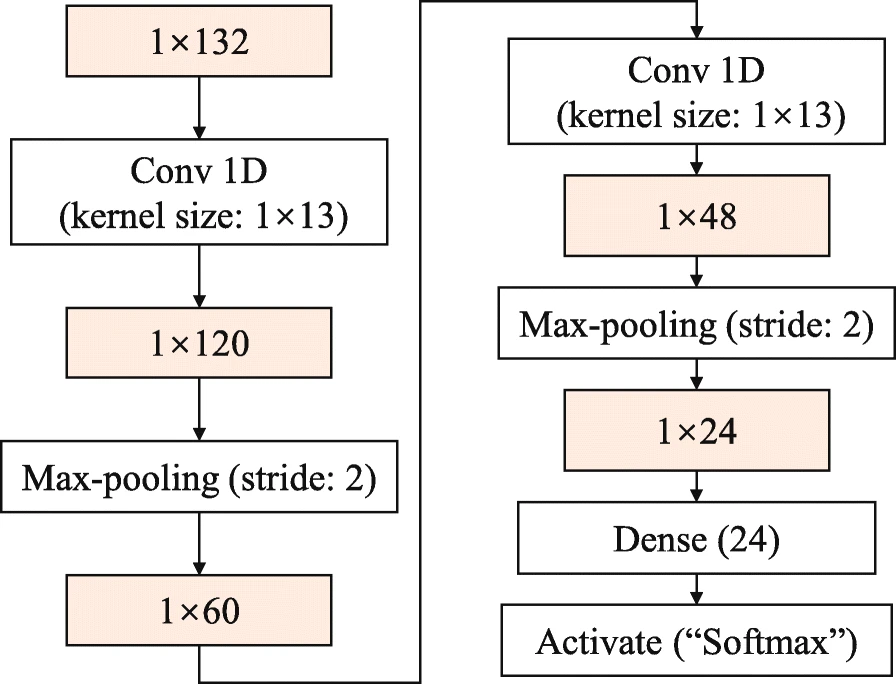

In [14]:
# Create sequential model 
clf = tf.keras.Sequential([
      Conv1D(filters=20, kernel_size=(13,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)),
      MaxPool1D(pool_size=(2,), strides=2, padding='same'),
      Conv1D(filters=20, kernel_size=(13,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)),
      MaxPool1D(pool_size=(2,), strides=2, padding='same'),
      Flatten(),
      Dense(units = 2, activation='softmax')
  ])
clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 187, 20)           280       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 94, 20)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 94, 20)            5220      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 47, 20)            0         
_________________________________________________________________
flatten (Flatten)            (None, 940)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1882      
Total params: 7,382
Trainable params: 7,382
Non-trainable params: 0
____________________________________________________

In [15]:
clf.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
clf.fit(X_train, y_train, epochs = 10)
Accuracy=[]
loss, test_accuracy = clf.evaluate(X_test, y_test)
print(f"Test Accuracy = ", test_accuracy )
Accuracy=Accuracy.append(test_accuracy)

Epoch 1/10
364/364 [==============================] - 4s 3ms/step - loss: 0.4900 - accuracy: 0.7659
Epoch 2/10
364/364 [==============================] - 1s 3ms/step - loss: 0.3591 - accuracy: 0.8416
Epoch 3/10
364/364 [==============================] - 1s 3ms/step - loss: 0.3032 - accuracy: 0.8756
Epoch 4/10
364/364 [==============================] - 1s 2ms/step - loss: 0.2637 - accuracy: 0.8975
Epoch 5/10
364/364 [==============================] - 1s 3ms/step - loss: 0.2248 - accuracy: 0.9118
Epoch 6/10
364/364 [==============================] - 1s 3ms/step - loss: 0.1902 - accuracy: 0.9274
Epoch 7/10
364/364 [==============================] - 1s 3ms/step - loss: 0.1641 - accuracy: 0.9384
Epoch 8/10
364/364 [==============================] - 1s 3ms/step - loss: 0.1447 - accuracy: 0.9478
Epoch 9/10
364/364 [==============================] - 1s 3ms/step - loss: 0.1382 - accuracy: 0.9488
Epoch 10/10
91/91 [==============================] - 0s 3ms/step - loss: 0.1137 - accuracy: 0.9629
T

 <B> light weight (in terms of learnable parameters) 1D CNN architecture for the given ECG data binary classification.

In [18]:
# Create sequential model 
clf = tf.keras.Sequential([
      Conv1D(filters=10, kernel_size=(13,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)),
      MaxPool1D(pool_size=(5,), strides=2, padding='same'),
      Conv1D(filters=20, kernel_size=(13,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)),
      MaxPool1D(pool_size=(5,), strides=2, padding='same'),
      Flatten(),
      Dense(units = 2, activation='softmax')
  ])
clf.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 187, 10)           140       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 94, 10)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 94, 20)            2620      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 47, 20)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 940)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1882      
Total params: 4,642
Trainable params: 4,642
Non-trainable params: 0
____________________________________________________

In [19]:
clf.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
clf.fit(X_train, y_train, epochs = 10)
Accuracy=[]
loss, test_accuracy = clf.evaluate(X_test, y_test)
print(f"Test Accuracy = ", test_accuracy )
Accuracy=Accuracy.append(test_accuracy)


Epoch 1/10
364/364 [==============================] - 1s 2ms/step - loss: 0.4958 - accuracy: 0.7553
Epoch 2/10
364/364 [==============================] - 1s 2ms/step - loss: 0.3627 - accuracy: 0.8381
Epoch 3/10
364/364 [==============================] - 1s 3ms/step - loss: 0.3019 - accuracy: 0.8792
Epoch 4/10
364/364 [==============================] - 1s 2ms/step - loss: 0.2418 - accuracy: 0.9137
Epoch 5/10
364/364 [==============================] - 1s 3ms/step - loss: 0.2023 - accuracy: 0.9261
Epoch 6/10
364/364 [==============================] - 1s 3ms/step - loss: 0.1652 - accuracy: 0.9405
Epoch 7/10
364/364 [==============================] - 1s 3ms/step - loss: 0.1525 - accuracy: 0.9464
Epoch 8/10
364/364 [==============================] - 1s 3ms/step - loss: 0.1330 - accuracy: 0.9529
Epoch 9/10
364/364 [==============================] - 1s 3ms/step - loss: 0.1237 - accuracy: 0.9561
Epoch 10/10
91/91 [==============================] - 0s 2ms/step - loss: 0.1076 - accuracy: 0.9636
T